# CS155 Miniproject 3
Emily Palmer, Peter Renn

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re
from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission,
    common_words_for_states
)

# Pre-processing

In [18]:
# Load data into obs, where each list is a line, and obs_map
def parse_observations(text):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n') if line.split()]

    obs_counter = 0
    obs = []
    obs_map = {}
    rhyme_pairs = []
    obs_elem = []
    last_word = []
    for line in lines:
        if len(line) <= 1:
            for line_ind in range(len(last_word)): 
                if line_ind in [0,1,4,5,8,9]:
                    #rhyme_map[obs_map[last_word[line_ind]]] = obs_map[last_word[line_ind + 2]]
                    rhyme_pairs.append([obs_map[last_word[line_ind]],obs_map[last_word[line_ind + 2]]])
                elif line_ind in [2,3,6,7,10,11]:
                    #rhyme_map[obs_map[last_word[line_ind]]] = obs_map[last_word[line_ind - 2]]
                    rhyme_pairs.append([obs_map[last_word[line_ind]],obs_map[last_word[line_ind - 2]]])
                elif line_ind == 12: 
                    #rhyme_map[obs_map[last_word[line_ind]]] = obs_map[last_word[line_ind + 1]]
                    rhyme_pairs.append([obs_map[last_word[line_ind]],obs_map[last_word[line_ind + 1]]])
                else: 
                    #rhyme_map[obs_map[last_word[line_ind]]] = obs_map[last_word[line_ind - 1]]
                    rhyme_pairs.append([obs_map[last_word[line_ind]],obs_map[last_word[line_ind -1]]])
            last_word = []
            continue
        
        for word in line:
            # Record each word in lowercase
            word = re.sub(r'[^\w]', '', word).lower()
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1
            
            # Add the encoded word.
            obs_elem.append(obs_map[word])
        
        # List of last words (for rhyming)
        last_word.append(word)
            
        # Add the encoded sequence.
        obs.append(obs_elem)
        obs_elem = []
            
            
    return obs, obs_map, rhyme_pairs


In [19]:
def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

In [20]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
# Obs is a list, where each element is a sonnet, of lists, where each element is a word number in the map
# Obs_map maps from words to numbers
obs, obs_map, rhyme_pairs = parse_observations(text)

# Unsupervised learning

In [21]:
# Train the HMM
HMM = unsupervised_HMM(obs,10,30)

Current iteration: 0
Current iteration: 1
Current iteration: 2
Current iteration: 3
Current iteration: 4
Current iteration: 5
Current iteration: 6
Current iteration: 7
Current iteration: 8
Current iteration: 9
Current iteration: 10
Current iteration: 11
Current iteration: 12
Current iteration: 13
Current iteration: 14
Current iteration: 15
Current iteration: 16
Current iteration: 17
Current iteration: 18
Current iteration: 19
Current iteration: 20
Current iteration: 21
Current iteration: 22
Current iteration: 23
Current iteration: 24
Current iteration: 25
Current iteration: 26
Current iteration: 27
Current iteration: 28
Current iteration: 29


In [22]:
emission = sample_sentence(HMM, obs_map, rhyme_pairs, n_syllables=10)
obs_map_r = obs_map_reverser(obs_map)
sentence = [[obs_map_r[i] for i in emission[j]] for j in range(len(emission))]
strs = [' '.join(s).capitalize() + '...\n' for s in sentence]
for s in strs: 
    print(s)

But that absence age too still better all...

And straight a fair in thou are fear am out...

In this therefore nor huge by so that call...

To think though lies even day we it stout...

Thou be neither stand had life assured...

More and my and far as more steal making...

O happy that the some treasure recured...

Those if grieve salving that kills mistaking...

Offences your unless her mine far sheds...

Rehearse deeds rigour better eye and not...

But sable define desire time end deeds...

Bath ere grow the on their shall on me blot...

For thy shines her wanting vermilion long...

Did night world some could pity in moods strong...



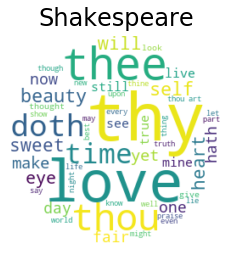

In [23]:
wordcloud = text_to_wordcloud(text, title='Shakespeare')

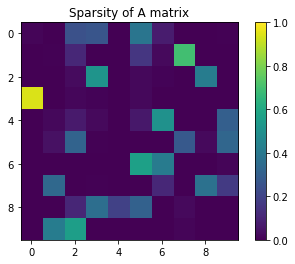

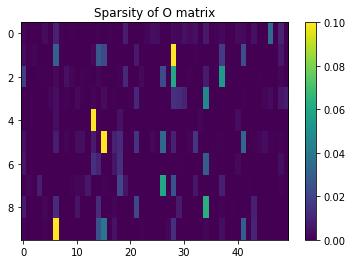

In [24]:
visualize_sparsities(HMM, O_max_cols=50)

In [28]:
words = common_words_for_states(HMM, obs_map)

In [29]:
i = 0
for state in words: 
    print('State: ' + str(i))
    for word in state: 
        print('    ' + str(obs_map_r[word]))
    i += 1

State: 0
    still
    life
    heart
    self
    sweet
    on
    is
    and
    eye
    love
State: 1
    when
    with
    the
    a
    and
    which
    i
    that
    to
    as
State: 2
    you
    all
    my
    thou
    is
    for
    to
    with
    in
    from
State: 3
    to
    more
    this
    doth
    thee
    your
    me
    thy
    of
    my
State: 4
    since
    when
    who
    if
    or
    which
    for
    o
    and
    but
State: 5
    no
    this
    in
    you
    not
    i
    love
    a
    thou
    the
State: 6
    all
    if
    yet
    and
    in
    thy
    so
    not
    it
    do
State: 7
    see
    me
    thee
    world
    am
    thou
    be
    by
    have
    to
State: 8
    make
    their
    and
    his
    art
    thee
    of
    me
    are
    thy
State: 9
    to
    what
    now
    shall
    as
    the
    that
    a
    and
    when
